In [4]:
import pandas as pd

# Load the datasets
stable_data_path = "cleaned_data_stable_595.csv"  
gas_gaf_data_path = "cleaned_data_gas_gaf_595.csv"  

# Read CSV files
stable_data = pd.read_csv(stable_data_path)
gas_gaf_data = pd.read_csv(gas_gaf_data_path)

# Filter out pilot and ineligible participants
filtered_data = stable_data[(stable_data["pilot"] != 1) & (stable_data["ineligible"] != 1)]

# Merge the dataframes on 'ID'
merged_data = pd.merge(filtered_data, gas_gaf_data, on="ID", how="inner")

# Save the merged data to a CSV file in the current working directory
merged_file_name = "merged_data.csv"
merged_data.to_csv(merged_file_name, index=False)
print(f"Merged data saved as: {merged_file_name}")

# Calculate percentages for demographics
def calculate_percentages(column, data):
    counts = data[column].value_counts()
    percentages = (counts / len(data)) * 100
    return percentages

# Calculate SES, race, and sex percentages
ses_percentages = calculate_percentages("d_ses", filtered_data)
race_percentages = calculate_percentages("d_race", filtered_data)
sex_percentages = calculate_percentages("d_sex", filtered_data)

# Add labels for Sex
sex_labels = {1: "Male", 2: "Female"}

# Calculate mean and SD for FIQ scores
fiq_mean = filtered_data["fiq_strict_bartlett_20y_rescaled"].mean()
fiq_sd = filtered_data["fiq_strict_bartlett_20y_rescaled"].std()

# Calculate mean and SD for GAS/GAF scores
gas_gaf_scores = ["GRXX_APM_20_yr", "GRXX_FPM_20_yr", "GRXX_OPM_20_yr"]
gas_gaf_means = merged_data[gas_gaf_scores].mean()
gas_gaf_sds = merged_data[gas_gaf_scores].std()

# Prepare the demographics table
demographics_data = []

# Add SES percentages without labels
for ses, percentage in ses_percentages.items():
    demographics_data.append({"Category": "SES", "Sub-Category": str(ses), "Details": f"{percentage:.2f}%"})

# Add Race percentages without labels
for race, percentage in race_percentages.items():
    demographics_data.append({"Category": "Race", "Sub-Category": str(race), "Details": f"{percentage:.2f}%"})

# Add Sex percentages with labels
for sex, percentage in sex_percentages.items():
    sex_label = sex_labels.get(sex, "Unknown Sex")
    demographics_data.append({"Category": "Sex", "Sub-Category": f"{sex} ({sex_label})", "Details": f"{percentage:.2f}%"})

# Add FIQ score details
demographics_data.append({"Category": "FIQ Score", "Sub-Category": "Mean", "Details": f"{fiq_mean:.2f}"})
demographics_data.append({"Category": "FIQ Score", "Sub-Category": "Standard Deviation", "Details": f"{fiq_sd:.2f}"})

# Add GAS/GAF score details with wave labels
for score in gas_gaf_scores:
    demographics_data.append({"Category": "GAS/GAF Score", "Sub-Category": f"{score} Mean", "Details": f"{gas_gaf_means[score]:.2f}"})
    demographics_data.append({"Category": "GAS/GAF Score", "Sub-Category": f"{score} SD", "Details": f"{gas_gaf_sds[score]:.2f}"})

# Convert demographics data to a DataFrame
demographics_df = pd.DataFrame(demographics_data)

# Save the demographics table to a CSV file in the current working directory
demographics_file_name = "Demographics_Table.csv"
demographics_df.to_csv(demographics_file_name, index=False)

print(f"Formatted demographics table saved as: {demographics_file_name}")


Merged data saved as: merged_data.csv
Formatted demographics table saved as: Demographics_Table.csv


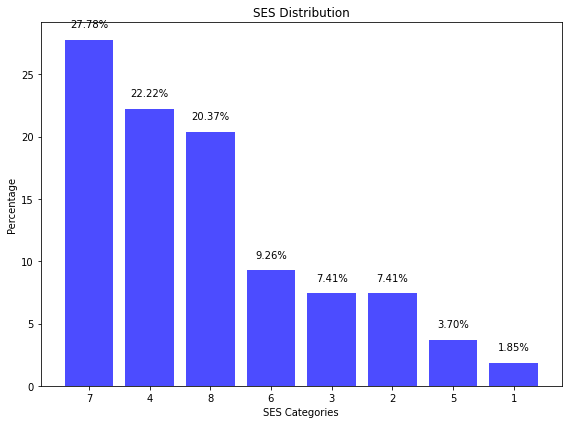

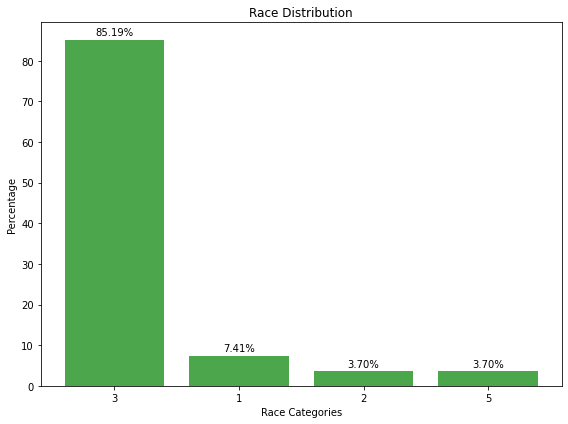

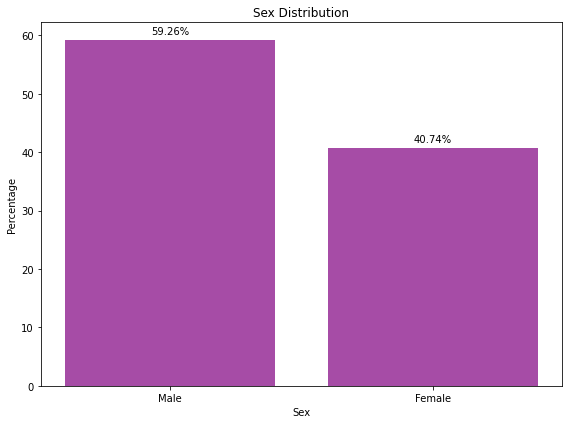

/var/folders/88/69d154ws5lg8y340_ltnj6qr0000gn/T/ipykernel_5227/1149227789.py:68: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(["FIQ"], [fiq_mean], yerr=[fiq_sd], fmt='o', capsize=8, color='blue', ecolor='black',


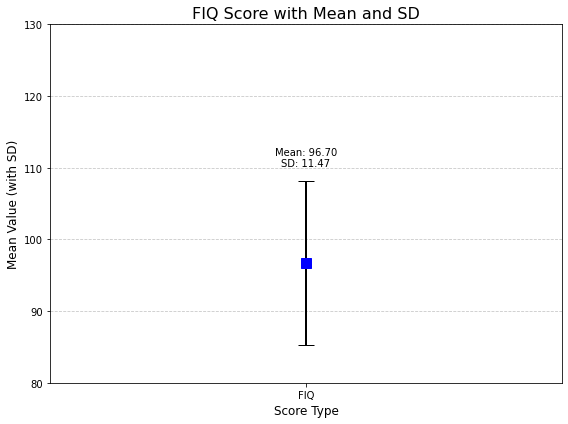

/var/folders/88/69d154ws5lg8y340_ltnj6qr0000gn/T/ipykernel_5227/1149227789.py:86: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(labels, gas_gaf_means, yerr=gas_gaf_sds, fmt='o', capsize=8, color='orange', ecolor='black',


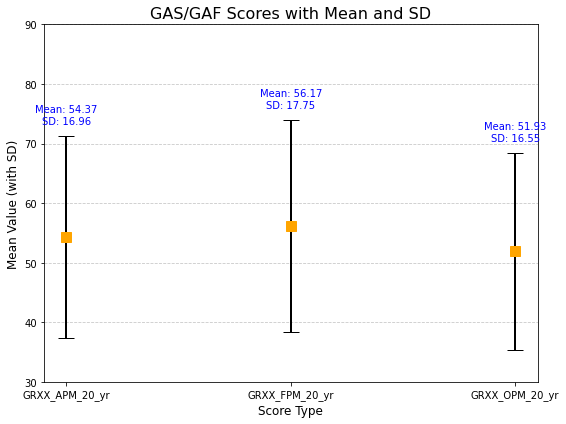

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Data preparation for SES, Race, and Sex
data = {
    "Category": ["SES", "SES", "SES", "SES", "SES", "SES", "SES", "SES",
                 "Race", "Race", "Race", "Race", "Sex", "Sex"],
    "Sub-Category": [7, 4, 8, 6, 3, 2, 5, 1, 
                     3, 1, 2, 5, "Male", "Female"],
    "Details": [27.78, 22.22, 20.37, 9.26, 7.41, 7.41, 3.70, 1.85, 
                85.19, 7.41, 3.70, 3.70, 59.26, 40.74]
}

df = pd.DataFrame(data)

# Plot SES distribution
plt.figure(figsize=(8, 6))
ses_data = df[df["Category"] == "SES"]
plt.bar(ses_data["Sub-Category"].astype(str), ses_data["Details"], color='blue', alpha=0.7)
for i, v in enumerate(ses_data["Details"]):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center')
plt.title("SES Distribution")
plt.xlabel("SES Categories")
plt.ylabel("Percentage")
plt.tight_layout()
plt.savefig("SES_Distribution.png")
plt.show()

# Plot Race distribution
plt.figure(figsize=(8, 6))
race_data = df[df["Category"] == "Race"]
plt.bar(race_data["Sub-Category"].astype(str), race_data["Details"], color='green', alpha=0.7)
for i, v in enumerate(race_data["Details"]):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center')
plt.title("Race Distribution")
plt.xlabel("Race Categories")
plt.ylabel("Percentage")
plt.tight_layout()
plt.savefig("Race_Distribution.png")
plt.show()

# Plot Sex distribution
plt.figure(figsize=(8, 6))
sex_data = df[df["Category"] == "Sex"]
plt.bar(sex_data["Sub-Category"].astype(str), sex_data["Details"], color='purple', alpha=0.7)
for i, v in enumerate(sex_data["Details"]):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center')
plt.title("Sex Distribution")
plt.xlabel("Sex")
plt.ylabel("Percentage")
plt.tight_layout()
plt.savefig("Sex_Distribution.png")
plt.show()

# Data preparation for FIQ and GAS/GAF Scores
scores_data = {
    "Score Type": ["FIQ", "GRXX_APM_20_yr", "GRXX_FPM_20_yr", "GRXX_OPM_20_yr"],
    "Mean": [96.7, 54.37, 56.17, 51.93],
    "SD": [11.47, 16.96, 17.75, 16.55]
}

scores_df = pd.DataFrame(scores_data)

# Plot FIQ Scores with Mean and SD
plt.figure(figsize=(8, 6))
fiq_mean = scores_df[scores_df["Score Type"] == "FIQ"]["Mean"].values[0]
fiq_sd = scores_df[scores_df["Score Type"] == "FIQ"]["SD"].values[0]
plt.errorbar(["FIQ"], [fiq_mean], yerr=[fiq_sd], fmt='o', capsize=8, color='blue', ecolor='black', 
             elinewidth=2, marker='s', markersize=10)
plt.text(0, fiq_mean + fiq_sd + 2, f"Mean: {fiq_mean:.2f}\nSD: {fiq_sd:.2f}", ha='center', fontsize=10)
plt.title("FIQ Score with Mean and SD", fontsize=16)
plt.xlabel("Score Type", fontsize=12)
plt.ylabel("Mean Value (with SD)", fontsize=12)
plt.ylim(80, 130)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("FIQ_Score_Mean_SD.png")
plt.show()

# Plot GAS/GAF Scores with Mean and SD
plt.figure(figsize=(8, 6))
gas_gaf_means = scores_df[scores_df["Score Type"] != "FIQ"]["Mean"].values
gas_gaf_sds = scores_df[scores_df["Score Type"] != "FIQ"]["SD"].values
labels = scores_df[scores_df["Score Type"] != "FIQ"]["Score Type"].values

plt.errorbar(labels, gas_gaf_means, yerr=gas_gaf_sds, fmt='o', capsize=8, color='orange', ecolor='black',
             elinewidth=2, marker='s', markersize=10)

# Add mean and SD above error sticks
for i, (mean, sd) in enumerate(zip(gas_gaf_means, gas_gaf_sds)):
    plt.text(i, mean + sd + 2, f"Mean: {mean:.2f}\nSD: {sd:.2f}", ha='center', fontsize=10, color='blue')

plt.title("GAS/GAF Scores with Mean and SD", fontsize=16)
plt.xlabel("Score Type", fontsize=12)
plt.ylabel("Mean Value (with SD)", fontsize=12)
plt.ylim(30, 90)  # Adjust vertical limit
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("GAS_GAF_Scores_Mean_SD.png")
plt.show()
